Visualizing mathematical concepts is an art. This is a fact proven at each video of [Grant Sanderson](http://www.3blue1brown.com/). Sometimes it is easy to forget the importance of seeing things, specially when dealing with concepts that are based upon different basis. Finite elements methods is a good example of a subject that was built upon a wide range of fields of mathematics and this is one of the challenges to overcome when one tries to understand the machinery behind it. 

There are plenty of good textbooks upon this subject but for me the one that really opened my eyes was the [Introduction to Numerical Methods for Variational Problems](https://github.com/hplgit/fem-book) by Professors Kent-Andre Mardal and Hans-Peter Langtangen. 
Thus the core ideas are extracted from their text, **however my understanding can both add new examples (which could help someone having a hard time visualizing the ideas) and plain wrong misinterpretations (I'm already sorry for that** and *I will definitely be glad if you correct anything!*).


<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Series-overview" data-toc-modified-id="Series-overview-1">Series overview</a></span></li><li><span><a href="#Approximation-of-Vectors" data-toc-modified-id="Approximation-of-Vectors-2">Approximation of Vectors</a></span></li><li><span><a href="#Approximation-of-functions" data-toc-modified-id="Approximation-of-functions-3">Approximation of functions</a></span></li><li><span><a href="#Vector-Spaces-and-Function-Spaces" data-toc-modified-id="Vector-Spaces-and-Function-Spaces-4">Vector Spaces and Function Spaces</a></span></li><li><span><a href="#Final-Remarks" data-toc-modified-id="Final-Remarks-5">Final Remarks</a></span></li><li><span><a href="#References" data-toc-modified-id="References-6">References</a></span></li></ul></div>

# Series overview

---

The present series of posts aims to gather some thoughts on the visualization of the Finite Element Method an approximation technique that started to become increasingly important after the 60's [[1](#cit-Thomee2001)] and today is largely used for the solution of linear and nonlinear partial derivative equations. The increase of computational power and the development of different specialized softwares (such as [Ansys](https://www.ansys.com/) and [ABAQUS](https://academy.3ds.com/en/software/abaqus-student-edition)) coupled with CAD disseminated this technique by allowing users without a deep background on numerical methods to perform studies solving different pre-build models in numerous geometries and boundary conditions.

In this series we will try to propose ***"new ways"*** [<sup id="a1">1</sup>](#f1) of introducing the mathematical concepts that forms the fundamental theory behind this widely known technique. A better understanding of such concepts might help students seeking to go one step further which will allow a better critical analysis of the outputs (on the post processing of results) and the ability to develop more sophisticated models without depending on existing models implemented by expensive softwares (which can still be automated by using a ***free package*** such as [FEniCS](https://fenicsproject.org/) or [Firedrake](https://www.firedrakeproject.org/)).

Herein, we expect to contribute on the already huge bibliography on such subject by providing more intuitive illustrations for the ideas behind this popular technique. For that, we separated the series on the following parts [<sup id="a2">2</sup>](#f2).

**1. Visualizing FEM - Part 1 - Spaces and its importance on the approximation of vectors ~~and functions~~**

**2. Visualizing FEM - Part 2 - Orthogonality  - The inner product as an interdependence measure**

**3. Visualizing FEM - Part 3 - Methods for approximations**

**4. Visualizing FEM - Part 3 - Picking your basis - Shape Functions and their virtues**

**5. Visualizing FEM - Part 5 - Local to global mapping - The elements of FEM**

**6. Visualizing FEM - Part 6 - Posidness - Why FEM work? and Why FEM doesn't work?**


**Part 1** will start to make use of abstractness in order to allow the use of the same techniques that can approximate vectors for functions (which are vectors after all!), this part will also present the concept of Vector Spaces, the playground for the approximations to take place. In **Part 2** we will dive on a concept that is straightforward for 2D vectors but that is more challenging to visualize for functions. With the tools from **Parts 1** and **2** we will build and briefly describe the methods for approximation of functions. In **Part 4** we will discuss the importance of carefully selecting good basis functions to describe our *Function Spaces* (a concept that will be shortly introduced in this first part as well!). **Part 5** will finally introduce the FEM technique on its *"natural habitat"* (solving PDE's). The last part, **Part 6**, will discuss the well posidness of mathematical problems, ~~(hopefully)~~ answering the title questions, why FEM works and why it fails sometimes.

Instead of directly presenting the approximation techniques for vectors and functions (something that is usually made on textbooks), **Part 1** will first show vectors and functions and some of their approximations. We will then look for ways to judge how good each approximation really is. It turns out that the same criteria used for vectors will also work for functions. The last part of the text will take us full circle explaining why this worked by explicitly showing that functions are vectors after all! 

Without further due, let's jump into some math!

# Approximation of Vectors

---

We will first consider a 2D Euclidean vector as it is the simplest way to visualize sizes and angles between them by using a Cartesian plan. We will be using the common orthogonal basis ($\hat{i} = \left[\begin{smallmatrix}1 \\ 0\end{smallmatrix}\right] $ and $\hat{j} = \left[\begin{smallmatrix} 0 \\ 1\end{smallmatrix} \right]$). First consider the vector:

\begin{equation}
v =   \begin{bmatrix}
      5 \\
      3 
      \end{bmatrix}
\end{equation}

We will try to find approximations for it with vectors that are on the line $f(x) = x$. We are limiting the possibilities of our approximation, this is important because the first step to approximate any mathematical object is to define a **space** where you will look for the approximations. We will be more formal on the definitions after we build the motivations to do so. For now, we are simply looking for the best approximation of $v$ on the line $f(x) = x$.

In [1]:
import numpy as np
import sympy as sy
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'

sy.init_printing(use_latex='mathjax')

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

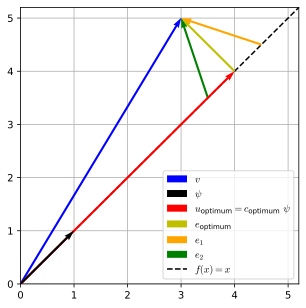

In [2]:
V = np.array([[3,5], [1,1]])

a_b = np.linspace(0, 20, 100)

plt.figure(figsize=(5,5))

plt.quiver(0, 0, 3, 5, color='b', units='xy', angles='xy', scale=1, zorder=3, label='$v$')

plt.quiver(0, 0, 1, 1, color='k', units='xy', angles='xy', scale=1, zorder=5, label=r'$\psi$')
plt.quiver(0, 0, 4, 4, color='r', units='xy', angles='xy', scale=1, zorder=4, label=r'$u_{\mathdefault{optimum}} = c_{\mathdefault{optimum}} \ \psi$')

plt.quiver(4, 4, -1, 1, color='y', units='xy', angles='xy', scale=1, zorder=3, label=r'$e_{\mathdefault{optimum}}$')
plt.quiver(4.5, 4.5, -1.5, 0.5, color='orange', units='xy', angles='xy', scale=1, zorder=3, label='$e_1$')
plt.quiver(3.5, 3.5, -0.5, 1.5, color='g', units='xy', angles='xy', scale=1, zorder=3, label='$e_2$')

plt.plot(a_b,a_b, 'k--', label='$f(x) = x$')


plt.xlim(0,5.2)
plt.ylim(0,5.2)
plt.xticks(np.arange(0,6))
plt.yticks(np.arange(0,6))

plt.legend(loc='lower right')
plt.grid()
plt.show()

Ok, I got carried away, we have **A LOT** going on in this figure. Let's go step by step and everything will be all right! First, in blue we can see our vector $v$. It is just defined as the sum of three units of $\hat{i}$, and 5 units of $\hat{j}$. This is simply "expanding" our vector $v$ into its components, the *basis vectors*. This idea is important, note that with our basis vectors we can construct any vector on this 2D plan! This is mathematically said by stating that vectors $\hat{i}$ and $\hat{j}$ *span* the vector space of 2D vectors. We will formally define vector space later, but here we can think about it as where our basis vectors span. 

Next, we se the black dashed line which is the graph of $f(x)$. It is where we are going to look for the approximations of $v$. We can think that we are looking for vectors which are of the form 

\begin{equation}
\boldsymbol{u} = c \ \boldsymbol{\psi}
\end{equation}

where  $\boldsymbol{\psi} = \left[\begin{smallmatrix} 1 \\ 1\end{smallmatrix} \right]$ and $c$ is a real valued constant. If we think carefully, by choosing properly our constant $c$ we can have any vectors on the top of the graph of $f(x)$. Thus, we see that $\boldsymbol{\psi}$ spans a subspace of the plan, the line that corresponds to the graph of $f(x)$. We will just give names, we say that our space spanned by $\boldsymbol{\hat{i}}$ and $\boldsymbol{\hat{j}}$ is $\boldsymbol{R}^2$ and for our subspace we will call $\boldsymbol{F}$. So we can state that we are looking for an approximation of $\boldsymbol{v}$, namely $\boldsymbol{u}$, on the subspace $\boldsymbol{F}$ of $\boldsymbol{R^2}$, defined by the basis vector $\boldsymbol{\psi}$. Nothing harmful, hum?

The next object on our graph is the red vector $u_{optimum}$, in this case we see that we have an error vector $\boldsymbol{e_{optimum}} = \boldsymbol{v} - \boldsymbol{u_{optimum}}$  which is described by the yellow vector. On this example it is easy to see that $\boldsymbol{u_{optimum}} = \left[\begin{smallmatrix} 4 \\ 4\end{smallmatrix} \right]$. This is, for now, a given information, and you can see this by checking that it is in fact the [orthogonal projection](https://en.wikipedia.org/wiki/Vector_projection#Definitions_in_terms_of_a_and_b) of $\boldsymbol{v}$ on $\boldsymbol{\psi}$.

I just preferred to show only[<sup id="a3">3</sup>](#f3)  the errors of two other approximations $\boldsymbol{u_1} = \left[\begin{smallmatrix} 4.5 \\ 4.5\end{smallmatrix} \right]$ and $u_2 = \left[\begin{smallmatrix} 3.5 \\ 3.5\end{smallmatrix} \right]$ (a vector that is a little bit longer - $c_1 = 4.5$ - than the optimum and one that is shorter - $c_1 = 3.5$ ) where we can see that the length of the errors associated with such approximations are bigger than $\boldsymbol{e_{optimum}}$. Notice also how the angle between such errors and the subspace $\boldsymbol{F}$ are different! 

Recall the formal definition of a dot product for vectors $\boldsymbol{a}$ and $\boldsymbol{b}$ in [Euclidean Space](https://en.wikipedia.org/wiki/Dot_product#Geometric_definition):


\begin{equation}
\boldsymbol{a} \cdot \boldsymbol{b} = \left\| \boldsymbol{a} \right\| \left\| \boldsymbol{b} \right\| \cos(\theta)
\end{equation}

Thus the angle between two vectors can be easily calculated by[<sup id="a4">4</sup>](#f4):

\begin{equation}
\cos(\theta) = \frac{\boldsymbol{a} \cdot \boldsymbol{b}}{\left\| \boldsymbol{a} \right\| \left\| \boldsymbol{b} \right\|}
\end{equation}

Finally, we get that the angle between $\boldsymbol{e_1}$ and $\boldsymbol{u_1}$ is $\theta_1 = 63.43^{\circ}$, conversely, $\theta_2 = 116.56^{\circ}$ and $\theta_{optimum} = 90.0^{\circ}$ that is, $e_{optimum}$ is perpendicular while the others have different angles with such subspace. Thus we can summerize that:

**When considering the approximation of 2D vectors the best approximation of a vector $\boldsymbol{v}$ in a subspace $\boldsymbol{F}$ will have:**

**1. The smallest error vector length**

**2. An orthogonal error vector to the subspace $\boldsymbol{F}$**

With such informations in mind, we will now go to the approximation of functions and see their behavior, and the features of the errors associated with them. Hopefully, we can see similar trends to the ones observed on the 2D Euclidean vectors ~~**spoiler alert**: we will~~.

# Approximation of functions 

---

We now consider the approximation of functions. Again, instead of finding the best approximation of a function using the Least Squares or Galerkin methods (we will define each one of them formally in the next part) we will just check that better approximations of a function follow the behavior that we require in both methods (the minimization of the error for the Least Squares and the orthogonality of the error and the basis functions for the Galerkin Method), that is, the behavior that we identified for our 2D Euclidean vectors.

Let's start by the Sine function. I am far from an enthusiast of periodic functions but we can't ignore the importance of it, a transcendental function that keeps appearing just like Euler and his exponential function in different branches of math. For that we remember that sines, cosines and the exponential function can all be defined as infinite series. For the Sine it follows:

\begin{equation}
\sin(x) = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + \cdot \cdot \cdot = \sum_{n=0}^{\infty} \frac{(-1)^n \ x^{2n+1}}{(2n+1)!}
\end{equation}

We will use two approximations, first a "coarser" function $u(x)_1 = x - \frac{x^3}{3!} + \mathcal{O}(x^5)$ followed by a better approximation $u(x)_2 = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + \mathcal{O}(x^9)$ and then compare both conditions seen for the vectors.

We will need to make minor adjustments to this quantities, the error becomes the L2-norm of the difference between the function and its approximation[<sup id="a5">5</sup>](#f5):

\begin{equation}
  e := \left\| f_e(x) - f_a(x) \right\|_{L2} = \sqrt{x_{1}^{2} + \cdots + x_{n}^{2}}
\end{equation}

where $f_e(x)$ is the exact function (in our example, $f_e(x) = \sin(x)$) and $f_a(x)$ is the approximation of the exact function (in our case, $f_a(x)$ is $u_1(x)$ and $u_2(x)$).

When considering the dot product, we will need to define a similar operator for our functions. Let's start by thinking what happens on this operation when dealing with vectors: we start by multiplying the correspondent components of each vector and finish summing this values. The vectors that we dealt earlier had all a finite number of components (2 to be specific), one easy way to see a correlation between a vector and a function is to consider functions as vectors with infinite dimensions. You may think that our 2D vector take us from the origin, moving us some $\boldsymbol{\hat{i}}$ units to right (or left if negative) and some $\boldsymbol{\hat{j}}$ up (or down if negative). Our functions take us from the domain to the codomain. Thus, the analogy could be to multiply the two functions that we seek to apply the inner product operator and integrate them. Formally, we can also use a different notation, $\langle \bullet , \bullet \rangle$ instead of the common $\bullet \cdot \bullet$ where $\bullet$ is a place holder for the vectors (~~or functions **which are vectors after all**~~) that are being operated on. Formally:

\begin{equation}
\langle e, \ f_a(x))\rangle := \int e \ f_a(x) \ dx
\end{equation}

Thus, lets start by plotting the exact function and their approximations.

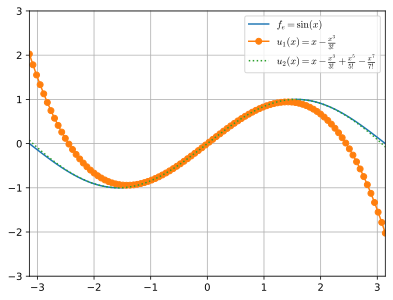

In [3]:
xs = np.linspace(-np.pi, np.pi, 100)
f = lambda x: x - x**3/6
g = lambda x: x - x**3/6 + x**5/120 - x**7/5040
plt.plot(xs, np.sin(xs), label=r'$f_e = \sin(x)$')
plt.plot(xs, f(xs), '-o', label=r'$u_1(x) = x - \frac{x^3}{3!}$')
plt.plot(xs, g(xs), ':', label=r'$u_2(x) = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!}$')
plt.ylim(-3, 3)
plt.xlim(-np.pi, np.pi)
plt.legend()
plt.grid()
plt.show()

In [12]:
e_f = np.linalg.norm(np.sin(xs) - f(xs), ord=2)
e_g = np.linalg.norm(np.sin(xs) - g(xs), ord=2)

print('Error of u_1(x) = %f' %e_f)
print('Error of u_2(x) = %f' %e_g)

Error of u_1(x) = 6.626720
Error of u_2(x) = 0.189658


In [4]:
def f_integrand(x):
    return (np.sin(x)-f(x))*f(x)

def g_integrand(x):
    return (np.sin(x)-g(x))*g(x)

sin_inner_f = integrate.quad(f_integrand,-np.pi, np.pi)[0]
sin_inner_g = integrate.quad(g_integrand,-np.pi, np.pi)[0]

print('Inner product of e(u_1(x)) and u_1(x) = %f' %sin_inner_f)
print('Inner product of e(u_2(x)) and u_2(x) = %f' %sin_inner_g)

Inner product of e(u_1(x)) and u_1(x) = -1.607863
Inner product of e(u_2(x)) and u_2(x) = 0.011099


*One minor observation is that initially the integration was performed analytically using [SymPy](http://www.sympy.org/pt/index.html), however the computational cost was very high (both integrations took 5 minutes). Thus, we use the numerical integration provided by [SciPy](https://www.scipy.org/) which took 10 ms.*

In order to just show the convergence we can use python classes to make it easier to construct approximations of different orders. Hence we can see how the error and the inner product behaviors as we increase the number of terms of the approximation.

In [5]:
def factorial(x):
    p = x
    val=1
    while p!=1:
        val *= p
        p -= 1

    return val

class sin_series(object):
    def __init__(self, o):
        self.o = o
    def approx(self, x):
        val = 0
        for n in range(self.o):
            val += (-1)**n * (x)**(2*n+1)/factorial(2*n+1)
        return (val)
    
    def integrand(self, x):
        return (np.sin(x)-self.approx(x))*self.approx(x)



Number of terms: 1
Error = 1.368209E+01
Inner product of e and f(x) = -1.438767E+01
Number of terms: 2
Error = 6.626720E+00
Inner product of e and f(x) = -1.607863E+00
Number of terms: 3
Error = 1.468801E+00
Inner product of e and f(x) = -2.561421E-01
Number of terms: 4
Error = 1.896580E-01
Inner product of e and f(x) = 1.109852E-02
Number of terms: 5
Error = 1.612283E-02
Inner product of e and f(x) = -8.627688E-04
Number of terms: 6
Error = 9.729159E-04
Inner product of e and f(x) = 4.073696E-05
Number of terms: 7
Error = 4.387964E-05
Inner product of e and f(x) = -1.501861E-06
Number of terms: 8
Error = 1.535991E-06
Inner product of e and f(x) = 4.380144E-08
Number of terms: 9
Error = 4.295373E-08
Inner product of e and f(x) = -1.037478E-09
Number of terms: 10
Error = 9.818362E-10
Inner product of e and f(x) = 2.035938E-11


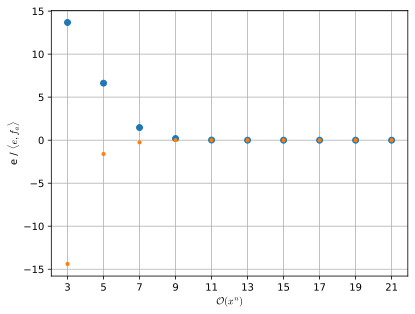

In [6]:
es = []
ips = []
orders = np.arange(3, 23, 2)
for i in range(10):
    i +=1
    ss = sin_series(i)
    e = np.linalg.norm(np.sin(xs) - ss.approx(xs), ord=2)
    ip = integrate.quad(ss.integrand,-np.pi, np.pi)[0]
    es.append(e)
    ips.append(ip)
    print('Number of terms: %d' %i)
    print('Error = %E' %e)
    print('Inner product of e and f(x) = %E'%ip)
    
plt.scatter(orders, es)
plt.scatter(orders, ips, s=10)
plt.xticks(orders)
plt.xlabel(r'$\mathcal{O}(x^n)$')
plt.ylabel(r'e / $\langle e, f_a \rangle$')
plt.grid(zorder=-1)
plt.gca().set_axisbelow(True)
plt.show()

So now we can see that the visual properties of vector approximations (smaller errors and closer to being perpendicular to the subspace where we are searching for the approximation) seems to stay true for functions as well. We now will formalize why this happens.

# Vector Spaces and Function Spaces 

---

Before reaching the definition of a space we will just formally define what a vector is. This will be enough for us to understand the similarity on the behavior of such objects. A vector is a mathematical object that can be **added** with other vector, or **scaled** by a *scalar*. This is straightforward for both the 2D vectors and for functions. Let's explore some examples, if we consider the 2D vector $\boldsymbol{u}_{optimum}$ it is just a scaled version of our basis vector $\boldsymbol{\psi}$. Notice also that a scaled vector is just a representation of a numerous sum of vector, in the case we would sum $\boldsymbol{\psi}$ with itself 4 times. Such important operations (sum and multiplication) are also related on the concept of numbers (probably multiplication was introduced to you like so, $2 \cdot 3 = 2 + 2 + 2$). Notice one interesting feature, the defining property of a vector is not directly related to geometry, direction, magnitude or whatsoever, but rather how it can be susceptible to very specific operations (scaling and addition, which are closely related as we saw!)[<sup id="a6">6</sup>](#f6).

Now that we intimately know the object in question, vectors (~~and functions~~), we  will focus on the Vector and Function spaces. Let's start from one of the most fundamental objects of math, sets! Sets are important mathematical objects as they group other objects forming a collection of similar (**or not**) objects (start imagining how powerful such definition really is! We can create sets of sets and consequently form subsets contained within bigger ones). 

The concept of a set is important because a space is just a set that has a *structure*, that is, some additional mathematical objects that add a sense to relations of individuals of the collection within a set. One example are operations which are mappings that associates an element of the set to every pair of its elements. For example, the sum operation on the naturals associates each element, 2 for instance, pairwise with every other elements (including 2, itself!), on the case, 2 and 0, 2 and 1, 2 and 2 and so on (some texts do not consider 0 as a Natural number, but here it is just a small example).

Finally, we can use such concepts to explain a **Vector Space**; it is just a set in which we add some very specific structures. The way that such structures should work are defined by *axioms* which are fundamental premises for the spaces.

However, before following we reached a problem... We forgot to define one important thing, **which candidates can act as a scalar on our vector space?** This is where the concept of a *Field* becomes important. Usually, a vector space is not defined *alone* but it is rather defined **over** a scalar field which describes how the **scalar itself** behaves under two operations, addition of scalars and multiplication of scalars (a better description can be found [here](https://en.wikipedia.org/wiki/Field_(mathematics)). Usually, the Real Field is used to define vectors on. 

The 8 axioms for a vector space are:

|                                   Axiom                                   |                                                   Meaning                                                  |
|:-------------------------------------------------------------------------:|:----------------------------------------------------------------------------------------------------------:|
|                         Associativity of addition                         |                                          $u + (v + w) = (u + v) + w $                                        |
|                         Commutativity of addition                         |                                                $u + v = v + u$                                               |
|                        Identity element of addition                       |          There exists an element $0 ∈ V$, called the zero vector, such that $v + 0 = v$ for all $v ∈ V$.         |
|                        Inverse elements of addition                       | For every $v ∈ V$, there exists an element $−v ∈ V$, called the additive inverse of $v$, such that $v + (−v) = 0$. |
|      Compatibility of scalar multiplication with field multiplication     |                                            $a(bv) = (ab)v $                                            |
|                 Identity element of scalar multiplication                 |                          $1v = v$, where $1$ denotes the multiplicative identity in $F$.                         |
| Distributivity of scalar multiplication with respect to vector addition   |                                             $a(u + v) = au + av$                                             |
|   Distributivity of scalar multiplication with respect to field addition  |                                             $(a + b)v = av + bv$                                             |
*Table from the [Wikipedia Page](https://en.wikipedia.org/wiki/Vector_space)*

Analyzing the structures we can see that such axioms can be followed by vectors and functions and finally we see that one can construct a vector and a function space where we can search for the approximations! If we choose properly, the approximations can be found by following a formalized algorithm. In this series, we will consider the Galerkin method.



# Final Remarks

---

The present series of blog posts aims to propose ways of visualizing the fundamental concepts of FEM. We start by showing examples of approximations of both 2D Euclidean vectors and single variable functions. We found out that better approximations have two important features: the measure of the error is smaller and the error and the vector space becomes "more orthogonal" as  the approximation gets better. These concepts were easier to visualize on the Euclidean vectors examples, however they remain true for functions, this happens because functions are vectors themselves. Finally,  we formalized the definitions of a vector and a function space, these structures will be helpful as the next part of this series will use such concepts to explain the orthogonality requirement and finally will lay the basis for the formalization of the methodologies to find the best approximation.

--- 

<b id="f1">1</b> I found it presumptuous to say that I have such new content to share. It is far more fair to say that I am just willing to present this concepts in a more concise way since I had a hard time to find the intuitions from numerous different sources. [↩](#a1)

<b id="f2">2</b> The full list of the parts will be updated accordingly. This will allow the series to continue as far my time and imagination ~~and sources to copy~~ permit me. [↩](#a2)

<b id="f3">3</b> Bear with me here, we already have the graph of a function, and two vectors on the same line! The figure would be too cluttered and definitely not elegant at all. [↩](#a3)

<b id="f4">4</b> For this calculations in python we can use:
```python
u = np.array([-1.5, 0.5])
v = np.array([4.5, 4.5])
c = np.dot(u,v) / (np.linalg.norm(u) * np.linalg.norm(v))
np.rad2deg(np.arccos(np.clip(c, -1, 1)))

```
Credits to [Olivier Verdier](https://stackoverflow.com/a/2827466/5874429).[↩](#a4)

<b id="f5">5</b> For the calculations here we will use the numerical values of the function that we calculate to make the plots, thus $n=100$[↩](#a5)

<b id="f6">6</b> I constantly regret not noticing this before trying to understand what a Tensor was...[↩](#a6)

# References
---

[<a id="cit-Thomee2001" href="#call-Thomee2001">1</a>] Thomee Vidar, "_From finite differences to finite elements - A short history of numerical analysis of partial differential equations_'', vol. 128, number , pp. 1--54,  2001.

